In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from sklearn.metrics.pairwise import euclidean_distances

In [26]:
df = pd.read_csv('../../data/cleaned_job_descriptions')
df.to_pickle('cleaned_job_descriptions.pickle')
#Disparity / Class Balance Check
df['job_title'].value_counts()

Recruiter            2042
Data Scientist       1597
Financial Analyst    1523
Physician            1462
Underwriter          1403
Chemical Engineer    1028
Name: job_title, dtype: int64

In [27]:
df["job_id"] = df["job_title"].factorize()[0]
job_id_df = df[['job_id', 'job_title']].drop_duplicates().sort_values('job_id')
id_to_job = dict(job_id_df[['job_id', 'job_title']].values)
# Setting targets and training data
features = df['job_desc'].values
targets = df['job_id']

In [28]:
job_id_df

,job_id,job_title
0,0,Data Scientist
410,1,Financial Analyst
773,2,Underwriter
2176,3,Chemical Engineer
3204,4,Physician
4666,5,Recruiter


In [29]:
def remove_stopwords(stopWords, descriptions):
    cleaned_descriptions = []
    for description in descriptions:
        temp_list = []
        for word in description.split():
            if word not in stopWords:
                temp_list.append(word.lower())
        cleaned_descriptions.append(' '.join(temp_list))
    return np.array(cleaned_descriptions)

def remove_punctuation(descriptions):
    no_punct_descriptions = []
    for description in descriptions:
        description_no_punct = ' '.join(RegexpTokenizer(r'\w+').tokenize(description))
        no_punct_descriptions.append(description_no_punct)
    return np.array(no_punct_descriptions)

def get_wordnet_pos(word):
    # nltk.download()

    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': wordnet.ADJ,
               'N': wordnet.NOUN,
               'V': wordnet.VERB,
               'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_descriptions(descriptions):
    cleaned_descriptions = []
    for description in descriptions:
        temp_list = []
        for word in description.split():
            cleaned_word = WordNetLemmatizer().lemmatize(word, get_wordnet_pos(word))
            temp_list.append(cleaned_word)
        cleaned_descriptions.append(' '.join(temp_list))
    return np.array(cleaned_descriptions)

def clean_descriptions(stopWords, descriptions):
    no_punct = remove_punctuation(descriptions)
    no_punct_sw = remove_stopwords(stopWords, no_punct)
    cleaned = lemmatize_descriptions(no_punct_sw)
    print(type(cleaned))
    return cleaned

def get_representative_jobs(df, kmeans):
    cluster_centers = kmeans.cluster_centers_
    for cent in cluster_centers:
        print('\nCluster Represnetations')
        dist = euclidean_distances(cent.reshape(1,-1), tfidf)
        order = np.argsort(dist)
        for o in order[0][:5]:
            title = df['job_title'].iloc[o]
            print(title)

In [30]:
if __name__ == '__main__':
    import os
    print("curr path is:")
    print(os.getcwd())
    
    
    # Setting targets and training data
    descriptions = df['job_desc'].values
    targets = df['job_id']
    
    
    # Creating stop words
    stopWords = set(stopwords.words('english'))
    add_stopwords = {
        'join', 'work', 'team', 'future', 'digital', 'technology', 'access', 'leader', 'industry', 'history', 'innovation',
        'year', 'customer', 'focused', 'leading', 'business', 'ability', 'country', 'employee', 'www', 'seeking',
        'location', 'role', 'responsible', 'designing', 'code', 'ideal', 'candidate', 'also', 'duty', 'without', 'excellent',
        'set', 'area', 'well', 'use', 'strong', 'self', 'help', 'diverse', 'every', 'day', 'equal', 'employment', 'opportunity',
        'affirmative', 'action', 'employer', 'diversity', 'qualified', 'applicant', 'receive', 'consideration', 'regard',
        'race', 'color', 'religion', 'sex', 'national', 'origin', 'status', 'age', 'sexual', 'orientation', 'gender',
        'identity', 'disability', 'marital', 'family', 'medical', 'protected', 'veteran', 'reasonable', 'accomodation',
        'protect', 'status', 'equal', 'discriminate', 'hire', 'hiring','inclusive', 'diverse','benefits','vacation','000','10','nike',"trustpilot"
    }
    
    stopWords = stopWords.union(add_stopwords)

    # Initializing punctuation remover and lemmatizer
    tokenize_remove_punct = RegexpTokenizer(r'\w+')
    lemma = WordNetLemmatizer()

    # Cleaning descriptions for both the whole dataset and CO only
    cleaned_descriptions = clean_descriptions(stopWords, descriptions)
    

curr path is:
/home/aqeelali7/Documents/Galvanize/Capstone-3-ATS/The-Right-Resume/src/jupyter-notebooks
<class 'numpy.ndarray'>


In [31]:
from sklearn.pipeline import Pipeline
def _split_data(df):

    return train_test_split(cleaned_descriptions, df['job_title'].values)

def fit(model, X,y):
    pipe = Pipeline([('vect', CountVectorizer(stop_words=stopWords, min_df=0.1, max_df=0.75, max_features=500,ngram_range=(1, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', model),
    ])
    pipe.fit(X,y)
    
    return pipe

def predict(pipe,X_test):
    return pipe.predict(X_test)

def predict_one(pipe, desc):
    return pipe.predict(pd.Series([desc])).tolist()[0]

def predict_one_proba(pipe, desc):
    return pipe.predict_proba(pd.Series([desc]))

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import accuracy_score,classification_report

In [33]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]


In [34]:
X_train, X_test, y_train, y_test = _split_data(df)

for model in models:
    model = fit(model,X_train,y_train)
    predictions = predict(model,X_test)
    print(model)
    print(accuracy_score(predictions,y_test))
    print(classification_report(predictions,y_test))

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.75, max_features=500, min_df=0.1,
                                 ngram_range=(1, 2),
                                 stop_words={'000', '10', 'a', 'ability',
                                             'about', 'above', 'access',
                                             'accomodation', 'action',
                                             'affirmative', 'after', 'again',
                                             'against', 'age', 'ain', 'all',
                                             'also', 'am', 'an', 'and', 'any',
                                             'applicant', 'are', 'area', 'aren',
                                             "aren't", 'as', 'at', 'be',
                                             'because', ...})),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 RandomForestClassifier(max_depth=3, n_estimators=200,
                                  

In [35]:
coefs = model.named_steps.clf.coef_
feats = model.named_steps.vect.get_feature_names()

# take coefficients and feature names, sorted? 

dct = {"feats":feats,"coef":coefs[0,:].tolist()}

titles = ["Chemical Engineer","Data Scientist","Financial Analyst","Physician","Recruiter","Underwriter"]

d = dict()
for i,title in enumerate(titles):
    coefs[i,:]
    dct = {"feats":feats,"coef":coefs[i,:].tolist()}
    top_words_df = pd.DataFrame(dct)
    top_words_df["coef"] = top_words_df["coef"].abs()
    top_words_df = top_words_df.sort_values("coef",ascending = False)
    a = top_words_df.feats.values.tolist()[:100]
    b = top_words_df.coef.values.tolist()[:100]
    d[title] = list(zip(a,b))
    
d["Chemical Engineer"]

[('engineering', 5.91798891493553),
 ('chemical', 4.8952258453416535),
 ('process', 3.447896681365333),
 ('engineer', 2.941066163338261),
 ('technical', 2.7514214814029647),
 ('project', 2.505124981241043),
 ('design', 2.4066918866065974),
 ('material', 2.26623123831976),
 ('equipment', 2.1475503908353746),
 ('test', 1.9013756303517442),
 ('site', 1.8118239472036348),
 ('financial', 1.8113616867711226),
 ('development', 1.7492148488534616),
 ('data', 1.7259462206696106),
 ('control', 1.6124659583419731),
 ('quality', 1.4018376453828763),
 ('safety', 1.348014290508083),
 ('production', 1.3446644741457543),
 ('product', 1.318957112571248),
 ('operation', 1.3131776576094893),
 ('recruiting', 1.1307411969884376),
 ('integrity', 1.1095111136441826),
 ('discipline', 1.0514892259523607),
 ('underwriting', 1.011596104367904),
 ('clinical', 1.0090092001278297),
 ('system', 0.9576926381893218),
 ('science', 0.9541112041822829),
 ('scale', 0.9348260140718111),
 ('analytics', 0.93405619947715),
 (

using dict of words... co
Use dict key value for word comparisons to resume
but only output the top keywords in each resume

 turn the top keywords of FA into a set. This set is what the model builds as a profile of an FA. 
    if 'analy' is in 'word':
        word = analysis
        
- if word.startswith('analy'):
    word = 'analysis
    change the keyword itself to something else

In [40]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

In [47]:
key_words = []
for i in range(len(d["Data Scientist"])):
    key_words.append(d["Data Scientist"][i][0])


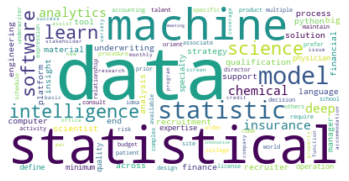

In [48]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
text = " ".join(text for text in key_words)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
X_train, X_test, y_train, y_test = _split_data(df)
model = fit(LogisticRegression(),X_train,y_train)
predictions = predict(model,X_test)
print(accuracy_score(predictions,y_test))
print(classification_report(predictions,y_test))

0.9642226148409894
                   precision    recall  f1-score   support

Chemical Engineer       0.97      0.99      0.98       257
   Data Scientist       0.96      0.92      0.94       423
Financial Analyst       0.93      0.96      0.94       402
        Physician       0.97      0.97      0.97       334
        Recruiter       0.98      0.98      0.98       486
      Underwriter       0.97      0.98      0.98       362

         accuracy                           0.96      2264
        macro avg       0.96      0.97      0.97      2264
     weighted avg       0.96      0.96      0.96      2264



In [37]:
import pickle
filename = 'LogisticRegression.sav'
pickle.dump(model, open(filename, 'wb'))

In [14]:
resume = "AQEEL ALI Aqeelali0312@gmail.com | (408) 718-0712 | www.linkedin.com/in/aqeelali786 EDUCATION: California Polytechnic University, San Luis Obispo, CA B.S. Business Administration – Financial Management Concentration Minor in Psychology ● Honors: Principal’s List (3.5+ GPA for three consecutive academic terms) - Fall 2019 ● Relevant Coursework: Financial Engineering in Risk Management, Computer Applications in Finance, Advanced Corporate Finance Chartered Financial Analyst Level Two Candidate Exam Date: Nov 2021 ● Pursuing CFA designation by acquiring a wide breadth of portfolio management skills. ● Level One Exam passed on June 2019. WORK EXPERIENCE: Middle Market Portfolio Analyst – Comerica Bank, San Jose, CA Jul 2019 to Present ● Analyze employer’s Middle Market business for the California region through industry, financial, macroeconomic data and other supporting credit information concerning an applicant's credit requests. ● Identify key business and financial risks that may impact the repayment prospects by the borrower. ● Expertise in Salesforce Data Management and CRM software systems utilized while underwriting to 8-figure commercial banking facilities ranging from $5M to $100M loans and facilities. aggregate exposure of bank assets. ● Prepare, review and assess the creditworthiness of commercial loan originations and renewals by evaluating tax returns, spreads of financial statements, historical trends, rent rolls, leases, projections, management performance, industry reports, cash flow models, capital structure and collateral analysis and other relevant data to analyze portfolio companies’ repayment capacity. ● Ensure the integrity of performance data for clientele and prospects and maintain ongoing relationships with thecustodial partners banks, vendors, and internal groups. ● Offer insights into customer financial needs, including opportunities identified using Line of Business-approved relationship expansion tools. Contribute personal insights related to a loan structure's effectiveness to mitigate risks, appropriate to prevailing competitive market environment and Bank risk tolerances. ● Prepared & presented nation-wide internal quarterly Company Q1 & Q2 2020 earnings reports and portfolio updates (within a team of four). ● Undertook special project initiative while fluidly adapting self-starter work ethic to a remote work environment during the initial rollout of Federal Treasury Payroll Protection Program and reviewed numerous applicants’ eligibility & fund usage during COVID-19 global pandemic. Venture Capital Analyst Intern - LDR Ventures, San Luis Obispo, CA Jan 2019 to Apr 2019 ● Analyzed investment opportunities up to $1.5M, prepared fundraising pitches to external stakeholders and prospective investors, and identified potential risks for early stage portfolio companies ● Assisted in building pricing models to help companies launch multiple new product lines and conduct stress tests under varying scenario analyses. ● Oversaw a personally proposed initiative for a portfolio company’s marketing campaign across universities in California. LEADERSHIP & OTHER RELEVANT EXPERIENCE Banking Valuations, Investment Banking Society San Luis Obispo, CA Jan 2019 to Feb 2019 ● Took an extracurricular course which covered the three main methods of company valuations ● Competed in a Goldman Sachs case competition against over 20 teams to create a pitch deck and presentation for a real case study. Recommended a company’s IPO by analyzing their financial position, creating a pro forma financial model, computing value with several valuation methodologies and examining IPO market conditions Member - MacIntalkers of Toastmasters International Apple Cupertino, CA Jul 2018 to Feb 2020 ● Delivered five public speeches under the “Dynamic Leadership” Pathways project. ● Developed effective communication skills on a weekly basis. " 
lyft_job_desc = "Financial Analyst, Strategy Finance at Lyft San Francisco, CA At Lyft, our mission is to improve people’s lives with the world’s best transportation. To do this, we start with our own community by creating an open, inclusive, and diverse organization.  Lyft is hiring a Financial Analyst for its Strategy Finance Team. The candidate in this position will provide financial and analytical support to drive strategic decisions for the company and help prepare financial management reporting. As a Financial Analyst, you will work directly with stakeholders across Finance in forecasting, planning and reporting key metrics to senior leadership.  Responsibilities: Help in analyzing & modeling forecast trends for total company financials Assist in the preparation and analysis of consolidated P&L for actuals and forecasts, help the FP&A team on deliverables, ongoing variance analysis, and ad hoc modeling Help lead the FP&A team through weekly and monthly forecasting Assist in the quarterly and annual strategic planning process Collaborate with Investor Relations by analyzing relevant financial information in preparation for the earnings call and investor presentations Team up with Corporate Development to create Board of Directors financials Partner with FP&A, Accounting, Treasury, Tax, and HR to forecast centralized expenses Drive monthly and quarterly close activities for FP&A and support consolidated management reporting Partner with Accounting to manage close timelines, process and reporting Manage creation of internal executive reporting documents including board, close and other management presentations and workbooks Support initiatives to create process efficiencies & improvements within FP&A Experience: BA/BS with 3+ years of experience in financial planning and analytics (FP&A) in a rigorous environment Corporate Finance, forecasting, or consolidations experience is a plus Detail-oriented and organized self-starter with a drive to dig into complex problems Advanced Excel skills. Experience building complex formulas and manipulating large data sets Ability to work in a fast-paced, team-based environment with minimal supervision Research, quantitative and analytical skills Comfortable navigating through financial statements Ability to organize and track overlapping tasks and assignments, with frequent priority changes Strong interpersonal and communication skills, with the ability to communicate and influence effectively across various departments Benefits: Great medical, dental, and vision insurance options Mental health benefits In addition to 12 observed holidays, salaried team members have unlimited paid time off, hourly team members have 15 days paid time off 401(k) plan to help save for your future 18 weeks of paid parental leave. Biological, adoptive, and foster parents are all eligible Pre-tax commuter benefits Lyft Pink - Lyft team members get an exclusive opportunity to test new benefits of our Ridership Program " 
cmgr_job_desc = "About the Role: Raydiant is looking for a lover of technology, a customer-success driven channel manager to help build the channel and achieve set goals.  Customer Success Managers (Channel) coordinate and work closely with various channel partners and affiliates to build and grow the pipeline and sell our solutions to businesses. As a channel customer success manager, you will manage Raydiant’s business relationships within the US; working with customers from many different industries. You will help us achieve our mission of managing the channel partners we have, qualify and recruit more qualified partners to help drive business and grow the channel side of the business. This role is based in the office at our San Francisco, CA headquarters in the SOMA neighborhood. What You Will Be Doing:  Prospecting, qualifying and on-boarding channel partners that can help the company drive business growth month over month Be able to forecast monthly sales revenue and achieve sales goals and KPIs set by management hannel customer success managers will help manage all partners with a focus on creating yearly and quarterly channel plans Be able to travel and meet channel partners, to conduct presentations and live demos of the product Channel customer success managers will focus on training Raydiant partners on effective methods for selling, using the partner portal and using Raydiant’s product Channel customer success managers will build an excellent relationship with channel partners and have a focus on retaining sophisticated partners while coaching inexperienced Raydiant partners on the best sales practices. Channel customer success managers will create monthly sales reports and communicate channel partners monthly commission to them in coordination with the finance department To own management of the channel PRM To conduct webinars to attract new partners and conduct training sessions on new products and services   What We Are Looking For:   Passion for sales in B2B The motivation to go the extra mile with a positive can-do attitude Bachelor’s degree or equivalent experience Excellent communication and relationship-building relationship skills; you like to negotiate and to achieve targets  Strong software and new technology awareness At least 2-years experience in channel sales within a SaaS product line Proficient with Salesforce"  
ds_1_desc = "We are looking for a Data Scientist who will support our product, sales, leadership and marketing teams with insights gained from analyzing company data. The ideal candidate is adept at using large data sets to find opportunities for product and process optimization and using models to test the effectiveness of different courses of action. They must have strong experience using a variety of data mining/data analysis methods, using a variety of data tools, building and implementing models, using/creating algorithms and creating/running simulations. They must have a proven ability to drive business results with their data-based insights. They must be comfortable working with a wide range of stakeholders and functional teams. The right candidate will have a passion for discovering solutions hidden in large data sets and working with stakeholders to improve business outcomes.Responsibilities for Data ScientistWork with stakeholders throughout the organization to identify opportunities for leveraging company data to drive business solutions.Mine and analyze data from company databases to drive optimization and improvement of product development, marketing techniques and business strategies.Assess the effectiveness and accuracy of new data sources and data gathering techniques.Develop custom data models and algorithms to apply to data sets.Use predictive modeling to increase and optimize customer experiences, revenue generation, ad targeting and other business outcomes.Develop company A/B testing framework and test model quality.Coordinate with different functional teams to implement models and monitor outcomes.Develop processes and tools to monitor and analyze model performance and data accuracy.Qualifications for Data ScientistStrong problem solving skills with an emphasis on product development.Experience using statistical computer languages (R, Python, SLQ, etc.) to manipulate data and draw insights from large data sets.Experience working with and creating data architectures.Knowledge of a variety of machine learning techniques (clustering, decision tree learning, artificial neural networks, etc.) and their real-world advantages/drawbacks.Knowledge of advanced statistical techniques and concepts (regression, properties of distributions, statistical tests and proper usage, etc.) and experience with applications.Excellent written and verbal communication skills for coordinating across teams.A drive to learn and master new technologies and techniques.We’re looking for someone with 5-7 years of experience manipulating data sets and building statistical models, has a Master’s or PHD in Statistics, Mathematics, Computer Science or another quantitative field, and is familiar with the following software/tools:Coding knowledge and experience with several languages: C, C++, Java,JavaScript, etc.Knowledge and experience in statistical and data mining techniques: GLM/Regression, Random Forest, Boosting, Trees, text mining, social network analysis, etc.Experience querying databases and using statistical computer languages: R, Python, SLQ, etc.Experience using web services: Redshift, S3, Spark, DigitalOcean, etc.Experience creating and using advanced machine learning algorithms and statistics: regression, simulation, scenario analysis, modeling, clustering, decision trees, neural networks, etc.Experience analyzing data from 3rd party providers: Google Analytics, Site Catalyst, Coremetrics, Adwords, Crimson Hexagon, Facebook Insights, etc."

In [15]:
print(predict_one(model, resume))
print(predict_one_proba(model, resume))
label = predict_one(model, resume)
label

Financial Analyst
[[1.10499581e-03 7.05109034e-03 9.48694129e-01 9.87673257e-04
  9.34939767e-04 4.12271715e-02]]


'Financial Analyst'

##  Display Top keywords for predicted job classification

- use split method on input string (resume in this case), 
- clean text of resume - like punctuation and stuff. 
- populate a split and add an item to a SET if the item is not in the SET.
- clean the items within the set with stemming
- on words that i manually truncate like finance, engineer, tell te user to 'add variations of the word "{word_here}"



take predicted class (job title in this case)
- compare words in resume against top 30~50 words
- suggest top 5-10 words needed.
- create a set of words based on resume, compared against pickled model of top keywords. 
- if i am missing ___ in my input, tell it to put ___ there. 

Get a list of all words in resume
    iterate through top words in the job (keywords_fa) set, 
        if topwords_FA not in resume:
            print top 5


In [49]:
resume = "AQEEL ALI Aqeelali0312@gmail.com | (408) 718-0712 | www.linkedin.com/in/aqeelali786 EDUCATION: California Polytechnic University, San Luis Obispo, CA B.S. Business Administration – Financial Management Concentration Minor in Psychology ● Honors: Principal’s List (3.5+ GPA for three consecutive academic terms) - Fall 2019 ● Relevant Coursework: Financial Engineering in Risk Management, Computer Applications in Finance, Advanced Corporate Finance Chartered Financial Analyst Level Two Candidate Exam Date: Nov 2021 ● Pursuing CFA designation by acquiring a wide breadth of portfolio management skills. ● Level One Exam passed on June 2019. WORK EXPERIENCE: Middle Market Portfolio Analyst – Comerica Bank, San Jose, CA Jul 2019 to Present ● Analyze employer’s Middle Market business for the California region through industry, financial, macroeconomic data and other supporting credit information concerning an applicant's credit requests. ● Identify key business and financial risks that may impact the repayment prospects by the borrower. ● Expertise in Salesforce Data Management and CRM software systems utilized while underwriting to 8-figure commercial banking facilities ranging from $5M to $100M loans and facilities. aggregate exposure of bank assets. ● Prepare, review and assess the creditworthiness of commercial loan originations and renewals by evaluating tax returns, spreads of financial statements, historical trends, rent rolls, leases, projections, management performance, industry reports, cash flow models, capital structure and collateral analysis and other relevant data to analyze portfolio companies’ repayment capacity. ● Ensure the integrity of performance data for clientele and prospects and maintain ongoing relationships with thecustodial partners banks, vendors, and internal groups. ● Offer insights into customer financial needs, including opportunities identified using Line of Business-approved relationship expansion tools. Contribute personal insights related to a loan structure's effectiveness to mitigate risks, appropriate to prevailing competitive market environment and Bank risk tolerances. ● Prepared & presented nation-wide internal quarterly Company Q1 & Q2 2020 earnings reports and portfolio updates (within a team of four). ● Undertook special project initiative while fluidly adapting self-starter work ethic to a remote work environment during the initial rollout of Federal Treasury Payroll Protection Program and reviewed numerous applicants’ eligibility & fund usage during COVID-19 global pandemic. Venture Capital Analyst Intern - LDR Ventures, San Luis Obispo, CA Jan 2019 to Apr 2019 ● Analyzed investment opportunities up to $1.5M, prepared fundraising pitches to external stakeholders and prospective investors, and identified potential risks for early stage portfolio companies ● Assisted in building pricing models to help companies launch multiple new product lines and conduct stress tests under varying scenario analyses. ● Oversaw a personally proposed initiative for a portfolio company’s marketing campaign across universities in California. LEADERSHIP & OTHER RELEVANT EXPERIENCE Banking Valuations, Investment Banking Society San Luis Obispo, CA Jan 2019 to Feb 2019 ● Took an extracurricular course which covered the three main methods of company valuations ● Competed in a Goldman Sachs case competition against over 20 teams to create a pitch deck and presentation for a real case study. Recommended a company’s IPO by analyzing their financial position, creating a pro forma financial model, computing value with several valuation methodologies and examining IPO market conditions Member - MacIntalkers of Toastmasters International Apple Cupertino, CA Jul 2018 to Feb 2020 ● Delivered five public speeches under the “Dynamic Leadership” Pathways project. ● Developed effective communication skills on a weekly basis. " 

def clean_input(resume):
    resume = (resume.split(" "))
    stopWords = set(stopwords.words('english'))
    tokenize_remove_punct = RegexpTokenizer(r'\w+')
    lemma = WordNetLemmatizer()

    # Cleaning descriptions for both the whole dataset and CO only
    return clean_descriptions(stopWords, resume)

resume = clean_input(resume)

AttributeError: 'set' object has no attribute 'words'

In [54]:
ce_resume = "Tim Kasteler, Chemical Engineer tim.q.kasteler@gmail.com linkedin.com/in/timqkasteler641-234-1466 Professional Summary Perceptive chemical engineer with 2+ years of experience. Skilled in process design and project management. Seeking to deliver out-of-the-box solutions at Agaffre, inc. At Lesiliti, lowered equipment malfunctions by 20% through improved work procedures and maintenance. Raised throughput 25% by designing two new production processes. Work Experience Chemical EngineerLesiliti, Inc.Feb 2017–May 2019    Slashed equipment malfunctions by 20% with improved work procedures and maintenance.    Trained 20 technicians and chemists in production best practices, cutting defects by 15%.    Designed and implemented new changeover procedures that saved 18 labor hours per week.    Increased throughput 25% through design of two new production processes. ChemistTrukgill, Inc.Feb 2016–Jan 2017    Developed new waste-stream treatment process that reduced waste output by 18%.    Created a new technique to retrieve by-products that saved $20,000 a year. Education 2011–2015 University of Northern IowaBachelor of Science in Chemical Engineering    Pursued a passion for process design coursework.    Conducted project in waste stream management that was written up in IChemE blog. Skills     Technical Skills: Project management, process design, testing, management    Soft Skills: Interpersonal skills, collaboration, communication, efficiency Activities   Leader of weekly fishing club.  financial  Article, “Waste Stream Management” published in Chemical Processing Blog."
occupation = predict_one(model, ce_resume)
# ce_resume = clean_input(ce_resume)

In [55]:
stopWords = set(stopwords.words('english'))
add_stopwords = {
    'join', 'work', 'team', 'future', 'digital', 'technology', 'access', 'leader', 'industry', 'history', 'innovation',
    'year', 'customer', 'focused', 'leading', 'business', 'ability', 'country', 'employee', 'www', 'seeking',
    'location', 'role', 'responsible', 'designing', 'code', 'ideal', 'candidate', 'also', 'duty', 'without', 'excellent',
    'set', 'area', 'well', 'use', 'strong', 'self', 'help', 'diverse', 'every', 'day', 'equal', 'employment', 'opportunity',
    'affirmative', 'action', 'employer', 'diversity', 'qualified', 'applicant', 'receive', 'consideration', 'regard',
    'race', 'color', 'religion', 'sex', 'national', 'origin', 'status', 'age', 'sexual', 'orientation', 'gender',
    'identity', 'disability', 'marital', 'family', 'medical', 'protected', 'veteran', 'reasonable', 'accomodation',
    'protect', 'status', 'equal', 'discriminate', 'hire', 'hiring','inclusive', 'diverse','benefits','vacation','000','10','nike',"trustpilot"
}

stopWords = stopWords.union(add_stopwords)

In [62]:
# get difference between words 
def suggested_keywords(resume,occupation):
# Generate list of key words for that class
    suggested_words,key_words = [],[]
    for i in range(len(d[occupation])):
        key_words.append(d[occupation][i][0])

# add to suggested words list if resume doesn't contain matching words
    for i,key_word in enumerate(key_words):
        if i > 10 and suggested_words == []:
            contains_top_10 = True
            return []
        if key_word not in resume:
            suggested_words.append(key_word)

# Look through list of needed words
# If any word stems begin with list of words to change, change it to a understandable output.
    start_of_words_to_change = ["financ","analy","engineer", "model",]
    for i,word in enumerate(suggested_words):
        for check in start_of_words_to_change:
            if word.startswith(check):
                if check == "financ":
                    suggested_words[i] = "Variations of the word: finance"

                elif check == "analy":
                    suggested_words[i] = "Variations of the word: analysis"

                else:
                    suggested_words[i] = f"Variations of the word: {check}"

    return suggested_words[:10]

if suggested_keywords(clean_input(ce_resume),occupation) == []:
    print("good job, you've got the top 10 words in your resume!")
    

else: print(suggested_keywords(clean_input(ce_resume),occupation))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
['material', 'site', 'development', 'data', 'control', 'quality', 'safety', 'operation', 'recruiting', 'integrity']


In [66]:
ds_resume = "Anne LounsberryData Scientist, Microsoft Certified523-299-0012anne.c.lounsberry@gmail.comlinkedin.com/in/annelounsbery12github.com/annecarollounsberry Summary Microsoft Certified Data Scientist with 10+ years of experience in Python, R, Java, and Scala. Applied data mining to analyze ABC Inc. procurement processes demonstrating potential savings of $420,000 a year. Seeking to leverage my data visualization and big data modeling skills to help increase XYZ’s investment returns in the upcoming year. ExperienceSenior Data ScientistACB Inc.Los Angeles, CA2013–2019Developed end-to-end machine learning prototypes and scaled them to run in production environments. Increased efficiency by 23%.Contributed meaningful improvements to existing machine learning models through carefully directed research.Derived actionable insights from massive data sets with minimal support.Provided input into the collection of new data sources and the refinement of existing ones to improve analysis and model development.Key achievement: Applied data mining to analyze procurement processes resulting in savings of $420,000 a year. Machine Learning SpecialistAnyCompanySan Diego, CA2008–2013Collaborated with all team members to optimize Customer Relationship Management database for a high-volume real estate firm.Increased repeat business among real estate investors by 25%.Decreased wasted phone and email time by 57%.Build a machine-learning-based system of matching clients with tailored investment opportunities. Increased customer retention by 30%. Junior Data AnalystCapgeminiSan Diego, CA2005–2008Consulted and worked with development teams to determine, execute and deliver relevant solutions.Analyzed old information architectures and contributed to the design and development of the new one.Provided information, feedback and guidance to clients to support technology-related decision making. Education MSc in StatisticsUCLA, Los Angeles, CA2005Key Skills Technical Skills: Machine Learning, Data Visualization, Big Data, Data MiningProgramming Languages: Python, R, Java, Scala, PERLSoft Skills: Problem-Solving, Active Learning, Risk Analysis Certifications 2014, Google Certified Professional Data Engineer2008, Microsoft Professional Program Certificate in Data Science"
occupation = predict_one(model, ds_resume)

<class 'numpy.ndarray'>


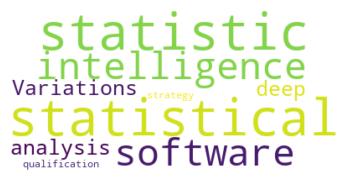

In [70]:
sug_words = suggested_keywords(clean_input(ds_resume),occupation)
text = " ".join(text for text in sug_words)
wordcloud = WordCloud(stopwords = ["chemical","insurance", "word","the","of"],background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



Given training on job descriptions, the goal is that the model can classify into these clusters (with percentage fit/matching) with NEW inputs. 

PCA/Cosine Similarity with eigenvectors. Model tells us % similarity.

 - go back and look at how features fit into the clusters
 
Find HTML template


# Recommend Jobs to Apply for Based On Resume


how to predict top jobs
- 
- based on current resume matchup, 
- spit out top 5 job URLs

## Cosine Similarity Matching

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
# count_matrix = cv.fit_transform(cleaned_descriptions)

In [83]:
ce_resume = "Tim Kasteler, Chemical Engineertim.q.kasteler@gmail.comlinkedin.com/in/timqkasteler641-234-1466 Professional Summary Perceptive chemical engineer with 2+ years of experience. Skilled in process design and project management. Seeking to deliver out-of-the-box solutions at Agaffre, inc. At Lesiliti, lowered equipment malfunctions by 20% through improved work procedures and maintenance. Raised throughput 25% by designing two new production processes. Work Experience Chemical EngineerLesiliti, Inc.Feb 2017–May 2019    Slashed equipment malfunctions by 20% with improved work procedures and maintenance.    Trained 20 technicians and chemists in production best practices, cutting defects by 15%.    Designed and implemented new changeover procedures that saved 18 labor hours per week.    Increased throughput 25% through design of two new production processes. ChemistTrukgill, Inc.Feb 2016–Jan 2017    Developed new waste-stream treatment process that reduced waste output by 18%.    Created a new technique to retrieve by-products that saved $20,000 a year. Education 2011–2015 University of Northern IowaBachelor of Science in Chemical Engineering    Pursued a passion for process design coursework.    Conducted project in waste stream management that was written up in IChemE blog. Skills     Technical Skills: Project management, process design, testing, management    Soft Skills: Interpersonal skills, collaboration, communication, efficiency Activities     Leader of weekly fishing club.    Article, “Waste Stream Management” published in Chemical Processing Blog."

occupation = predict_one(model, ce_resume)
# ce_resume = clean_input(ce_resume)

In [107]:
resume = "AQEEL ALI Aqeelali0312@gmail.com | (408) 718-0712 | www.linkedin.com/in/aqeelali786 EDUCATION: California Polytechnic University, San Luis Obispo, CA B.S. Business Administration – Financial Management Concentration Minor in Psychology ● Honors: Principal’s List (3.5+ GPA for three consecutive academic terms) - Fall 2019 ● Relevant Coursework: Financial Engineering in Risk Management, Computer Applications in Finance, Advanced Corporate Finance Chartered Financial Analyst Level Two Candidate Exam Date: Nov 2021 ● Pursuing CFA designation by acquiring a wide breadth of portfolio management skills. ● Level One Exam passed on June 2019. WORK EXPERIENCE: Middle Market Portfolio Analyst – Comerica Bank, San Jose, CA Jul 2019 to Present ● Analyze employer’s Middle Market business for the California region through industry, financial, macroeconomic data and other supporting credit information concerning an applicant's credit requests. ● Identify key business and financial risks that may impact the repayment prospects by the borrower. ● Expertise in Salesforce Data Management and CRM software systems utilized while underwriting to 8-figure commercial banking facilities ranging from $5M to $100M loans and facilities. aggregate exposure of bank assets. ● Prepare, review and assess the creditworthiness of commercial loan originations and renewals by evaluating tax returns, spreads of financial statements, historical trends, rent rolls, leases, projections, management performance, industry reports, cash flow models, capital structure and collateral analysis and other relevant data to analyze portfolio companies’ repayment capacity. ● Ensure the integrity of performance data for clientele and prospects and maintain ongoing relationships with thecustodial partners banks, vendors, and internal groups. ● Offer insights into customer financial needs, including opportunities identified using Line of Business-approved relationship expansion tools. Contribute personal insights related to a loan structure's effectiveness to mitigate risks, appropriate to prevailing competitive market environment and Bank risk tolerances. ● Prepared & presented nation-wide internal quarterly Company Q1 & Q2 2020 earnings reports and portfolio updates (within a team of four). ● Undertook special project initiative while fluidly adapting self-starter work ethic to a remote work environment during the initial rollout of Federal Treasury Payroll Protection Program and reviewed numerous applicants’ eligibility & fund usage during COVID-19 global pandemic. Venture Capital Analyst Intern - LDR Ventures, San Luis Obispo, CA Jan 2019 to Apr 2019 ● Analyzed investment opportunities up to $1.5M, prepared fundraising pitches to external stakeholders and prospective investors, and identified potential risks for early stage portfolio companies ● Assisted in building pricing models to help companies launch multiple new product lines and conduct stress tests under varying scenario analyses. ● Oversaw a personally proposed initiative for a portfolio company’s marketing campaign across universities in California. LEADERSHIP & OTHER RELEVANT EXPERIENCE Banking Valuations, Investment Banking Society San Luis Obispo, CA Jan 2019 to Feb 2019 ● Took an extracurricular course which covered the three main methods of company valuations ● Competed in a Goldman Sachs case competition against over 20 teams to create a pitch deck and presentation for a real case study. Recommended a company’s IPO by analyzing their financial position, creating a pro forma financial model, computing value with several valuation methodologies and examining IPO market conditions Member - MacIntalkers of Toastmasters International Apple Cupertino, CA Jul 2018 to Feb 2020 ● Delivered five public speeches under the “Dynamic Leadership” Pathways project. ● Developed effective communication skills on a weekly basis. " 
cp_resume = "Colin ParkerData ScientistMenlo Park, CA; open to remotecolin.parker@gmail.com           GitHub /cmp5au         LinkedIn /colinmp        (757) 331-0304TECHNICAL SKILLSPython: Pandas, NumPy, SciPy Stats, MatPlotLib, Scikit-LearnBig Data: Spark, AWS S3, AWS EC2, DockerData Science: SQL, MongoDB, Statistics, Machine Learning, Regression Models, Classification Techniques, Web Scraping, Data Analytics, Linux, Bash, Git, GitHubDATA SCIENCE PROJECTSCommon Material Imbalances in Chess  [Github link] | EDA and Hypothesis Testing on Chess Match DataAnalyzed over 5 million amateur-level blitz games from Lichess.org using Bash scripting to check for 77 different board positions and determine the outcome of the gameUsed Python libraries Pandas and MatPlotLib to distill command-line output and visualize findingsPresented insights and data visualizations to an audience of data scientistsResults: Discovered 3 statistically significant effects on outcome of the game in an equal-material situation"
lyft_job_descdesc = "Financial Analyst, Strategy Finance at Lyft San Francisco, CA At Lyft, our mission is to improve people’s lives with the world’s best transportation. To do this, we start with our own community by creating an open, inclusive, and diverse organization.  Lyft is hiring a Financial Analyst for its Strategy Finance Team. The candidate in this position will provide financial and analytical support to drive strategic decisions for the company and help prepare financial management reporting. As a Financial Analyst, you will work directly with stakeholders across Finance in forecasting, planning and reporting key metrics to senior leadership.  Responsibilities: Help in analyzing & modeling forecast trends for total company financials Assist in the preparation and analysis of consolidated P&L for actuals and forecasts, help the FP&A team on deliverables, ongoing variance analysis, and ad hoc modeling Help lead the FP&A team through weekly and monthly forecasting Assist in the quarterly and annual strategic planning process Collaborate with Investor Relations by analyzing relevant financial information in preparation for the earnings call and investor presentations Team up with Corporate Development to create Board of Directors financials Partner with FP&A, Accounting, Treasury, Tax, and HR to forecast centralized expenses Drive monthly and quarterly close activities for FP&A and support consolidated management reporting Partner with Accounting to manage close timelines, process and reporting Manage creation of internal executive reporting documents including board, close and other management presentations and workbooks Support initiatives to create process efficiencies & improvements within FP&A Experience: BA/BS with 3+ years of experience in financial planning and analytics (FP&A) in a rigorous environment Corporate Finance, forecasting, or consolidations experience is a plus Detail-oriented and organized self-starter with a drive to dig into complex problems Advanced Excel skills. Experience building complex formulas and manipulating large data sets Ability to work in a fast-paced, team-based environment with minimal supervision Research, quantitative and analytical skills Comfortable navigating through financial statements Ability to organize and track overlapping tasks and assignments, with frequent priority changes Strong interpersonal and communication skills, with the ability to communicate and influence effectively across various departments Benefits: Great medical, dental, and vision insurance options Mental health benefits In addition to 12 observed holidays, salaried team members have unlimited paid time off, hourly team members have 15 days paid time off 401(k) plan to help save for your future 18 weeks of paid parental leave. Biological, adoptive, and foster parents are all eligible Pre-tax commuter benefits Lyft Pink - Lyft team members get an exclusive opportunity to test new benefits of our Ridership Program " 
occupation = predict_one(model, cp_resume)
cp_resume = cp_resume.replace('\r', ' ').replace('\n', ' ')
desc_df = df[df['job_title']==occupation]
desc_df= desc_df.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"])
desc_df = desc_df.drop_duplicates(subset=['url'],keep='first')


In [108]:
# index into df where it matches occupation
from sklearn.metrics.pairwise import cosine_similarity

descs = list(desc_df["job_desc"])
d = {}
for i in range(len(desc_df)):
    url = desc_df.iloc[i,1]
    desc = desc_df.iloc[i,2]
    desc_matrix = cv.fit_transform([cp_resume,desc])
    if url in d.keys():
        print(i)
        print('duplicate value found!')
    if url not in d.keys():
        d[url] = cosine_similarity(desc_matrix)[0][1]  

In [109]:
sorted_d = [(k,v) for k, v in sorted(list(d.items()), key = lambda x : x[1])][::-1]
sorted_d[:5]

[('https://www.indeed.com/rc/clk?jk=ef758c2a2cc9bd0e&fccid=cceb23865a19cf1f&vjs=3',
  0.5983171506825267),
 ('https://www.indeed.com/rc/clk?jk=e7fd76df69df2bba&fccid=e309b8a71206cc5c&vjs=3',
  0.588248889386967),
 ('https://www.indeed.com/rc/clk?jk=cfece4422431a05e&fccid=71577148eaac7151&vjs=3',
  0.5863527298559493),
 ('https://www.indeed.com/rc/clk?jk=09f8cd8459b8f448&fccid=f0595ebb13247329&vjs=3',
  0.5843174662988364),
 ('https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BVoV32QmoUFgOupNolFmN9Fybhu4UG63m2DRXRK3OC9u2gTASRHwTteS7igaL9EldSSuCjYP1Ptq4LwI9P4lT1zRf9b0wZv1khMeqjdA4lBRRZxNAXAzSQes2FHqaa1VSon-smN7IuJaMVTdqJfmIx1lkO8pT7PNygT_3OpT49zB9qjiwgS7PY8udUS4VPSsMMpgo2N7gW6AbfAZLr0dtPAfw9zvL7oLZm90ELF8xyDKoxeEsrGJkBu-2y5LDOjiMYTc7Q-ufA3weEYEOWF8ZHyjKwFPivHpkRBIrK_ocCrctg3gB8JvvwlVqC25dOZKo_p-wZfof6KqUQrY4mIM9b6DchHGv-B8KSr9ynYM3F3BFEsxgxw0x1n5RMJAgv3ZQEkAqNMHyKICDU1sJVtmmZ3im3hYYTU91ftdaRLcqGIqgBD1yv4pTMtcCem98In0dm8YvnMTnD2UDwFGcbst8LuPEsxW95HQWxlhL6MMfM6BrP-78XMrgf_tn_AtDjOIfdcWt5

In [110]:
matchPercentage =  round(cosine_similarity(resume_count_matrix)[0][1]*100,2)

NameError: name 'resume_count_matrix' is not defined

In [ ]:
matchPercentage

In [ ]:
from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(),
    LinearSVC()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []


X_train, X_test, y_train, y_test = _split_data(df)
# for _model in models:
#     model = fit(_model,X_train,y_train)
#     accuracies = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=CV)
#     for fold_idx, accuracy in enumerate(accuracies):
#         entries.append((_model, fold_idx, accuracy))

labels = df['job_title']
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df['job_desc']).toarray()

for _model in models:
    model_name = _model.__class__.__name__
#     _model = _model.fit(X_train,y_train)
    accuracies = cross_val_score(_model, features, labels, scoring='accuracy', cv=CV)
    print(accuracies)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
print(cv_df)

In [ ]:

plt.figure(figsize=(20,20))

plt.boxplot(x=cv_df,labels = labels)

# labels = ["Chemical Engineer" ,  "Data Scientist", "Financial Analyst" ,  "Physician",   "Recruiter" ,  "Underwriter"]
labels = "Logistics Regression","Linear SVC" , 

In [ ]:

import seaborn as sns

labels = cv_df['model_name']
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.figure(20,20)
plt.show()